In [1]:
from manifoldpy.manifoldpy import api
from pprint import pprint
import matplotlib.pyplot as plt

with open('api_key.txt', 'r') as f:
    api_key = f.read().strip()

from datetime import datetime, timedelta

# get the current time
now = datetime.now()

# subtract one day
one_day_ago = now - timedelta(hours=9)

# convert to Unix timestamp
timestamp = int(one_day_ago.timestamp()) * 1000
print(timestamp)

markets = api.get_all_markets(after=timestamp)

1692378506000
Fetched 147 markets.


In [ ]:

# make sure all markets are not None
new_markets = [i for i in markets if i and i.createdTime > timestamp]

# get only markets where outcomeType is 'BINARY'
new_markets = [i for i in new_markets if i.outcomeType == 'BINARY']

# get only markets where probability is less than 0.1
new_markets = [i for i in new_markets if i.probability < 0.15 and i.probability > 0.04]

new_markets

In [45]:
for market in new_markets:
    market.get_full_data()

In [50]:
# get only markets where the last bet was placed less than 6 hours ago
six_hours_ago = int((now - timedelta(hours=6)).timestamp()) * 1000

new_markets = [market for market in new_markets if market.bets[-1].createdTime > six_hours_ago]

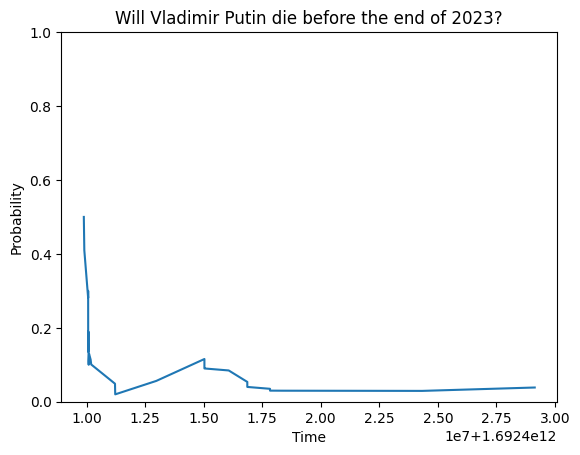

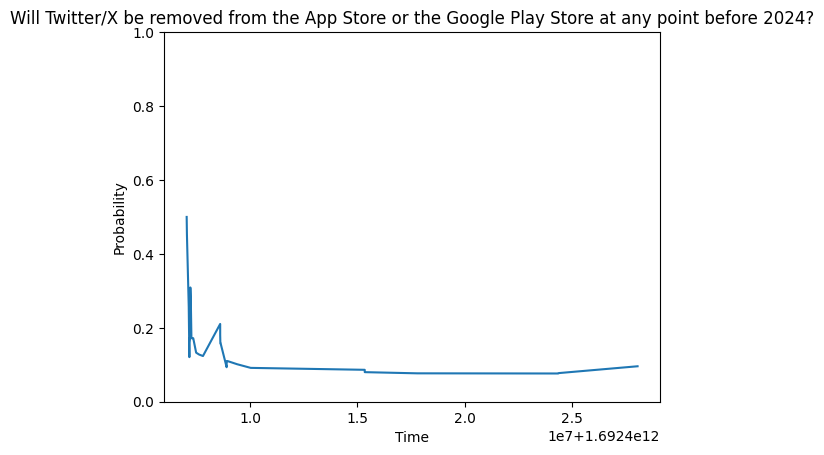

In [51]:
def graph_market(market):
    times, probabilities = market.probability_history()
    plt.plot(times, probabilities)
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.title(market.question)
    # set the y axis to be between 0 and 1
    plt.ylim(0, 1)
    plt.show()

for market in new_markets:
    graph_market(market)


In [52]:
# place a 'NO' bet on each market in new_markets

for market in new_markets:
    api.make_bet(api_key, 10, market.id, 'NO')